## Problem:

- Putting a yt projection plot and a regular matplotlib plot in the same figure is challenging


## How I initially tried to solve this:

- Plotting where the ray is in an xy Slice Plot of the gas density of a specific Ion (though not line number)
    
    ### Problems with this:
    
    - I was only going to make 1 slice and just clear and redraw the rays in the plot to save time
        - Only shows how arrow moves in the y direction
        - I can't use the same slice over and over again because it disregards the ray's position in the
          z-direction
          

## Possible Solutions:

- Plot an xz and a yz slice plot (annotated), but update the slice each iteration
    - If it's xz, slice where y is in each iteration
    - If it's yz, slice where x is in each iteration
    
 ### Pros:
    
    - It would be a really really good representation of where the ray is
    
 ### Cons:
    
    - The code would take forever to run since the 2 sliceplots and spectrum are changing per iteration
    



- Learn how to incorporate yt projection plots and a regular matplotlib plot in the same figure

    ### Pros:
    
    - No need to update projection plots each iteration so it would be faster than the previous solution
    
 ### Cons:
    
    - Could be hard to figure out
    - Not as clear as slice plots
    
    


- Learn how to do a 3D plot and use that to show where the ray is

    ### Pros:
    
    - Only 1 plot instead of 2
    - No need to update
        - Could be the fastest option
    
 ### Cons:
    
    - I've never done a 3D plot before so I would need to figure out how to do that first
        - Do I use the ones from yt or is it easier to make my own?
        - If I choose the yt option, then I also have to figure out how to put it in the same figure as a
          matplotlib plot

In [1]:
import chollaread
import numpy as np
import yt
import trident
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap, plasma
import cv2
import glob
import re

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/146.h5',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-01-12 19:18:42,604 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-01-12 19:18:42,604 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-01-12 19:18:42,605 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-01-12 19:18:42,605 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-01-12 19:18:42,605 Parameters: cosmological_simulation   = 0.0


In [ ]:
def spec_and_slice():
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    
    for i in range(Ny):
        for j in range(Nz):
        
            ray_start = np.array([x0,y0+(i*cu),z0+(j*cu)])*k
            ray_end = np.array([x,y+(i*cu),z+(j*cu)])*k

            ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas')



            sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=0.01)
            
            if DIY==False:
            
                sg.make_spectrum(ray, lines=[line])
                sg.save_spectrum('spec.txt')
                
            else:
                sg.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None, identifier=line)

                sg.make_spectrum(ray, lines=[line])
                sg.save_spectrum('spec.txt')

            f = np.loadtxt('spec.txt')
            lam = f[:,0] # All rows, 1st column
            flux = f[:,2]

            tog = np.array([lam, flux])
            arrays.append(tog)
    
    # Defines preliminary stuff for slice and spectrum
    p = np.array(ds.all_data()[ion_den])
    a = p.reshape(512, 256, 256)

    get_cmap("cet_bmw")
    reds = get_cmap('cet_glasbey_warm')
    colors = reds(np.linspace(0,1,Ny*Nz))

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(13, 13))
    
    
    ax[0].set_facecolor('lightgray')

    ax_x = np.arange(513)*(20/512)-10
    ax_y = np.arange(257)*(20/512)-5
    
    # Make Slice Plot
    sp = ax[0].pcolormesh(ax_x, ax_y, a[:,:,128].T, cmap = "cet_bmw", norm=colors.LogNorm())
    cb = fig.colorbar(sp, pad=0.02, ax=ax[0]) 
    cb.set_label(label='Density (g/cm$^3$)', size=15)
    cb.ax.tick_params(labelsize='large')
    sp.set_clim(vmin=10**-41, vmax=10**-23)
    # Add ray and save
    for m in range(Ny*Nz):
        # Need to fix this whole section
        testarrow = ax[0].arrow(xs[m],ys[m],dxs[m],dys[m],color='black', 
                              ec='black', lw=1, head_width=0.14, length_includes_head=True)


        fig.savefig('slice_samples/test'+str(i)+'.jpg')

        testarrow.remove()


    for n in range(Ny*Nz):
        pl1 = ax[1].plot(arrays[0][0], arrays[n][1], alpha=0.8, label=str(n+1), color=colors[n], linewidth=2)
        pl1.set_xlim(lmin, lmax)
        pl1.set_title(line, fontsize=14)
        pl1.legend(fontsize='large')
        pl1.set_xlabel('Wavelength', fontsize=14)
        pl1.set_ylabel('Relative Flux', fontsize=14)
        

        
        fig.savefig('SpecMov/spectrum'+str(n)+'.jpg')

In [3]:
trident.add_ion_fields(ds, ions=['O I'], ftype="gas")

In [4]:
p = np.array(ds.all_data()['O_p0_density'])
a = p.reshape(512, 256, 256)

get_cmap("cet_bmw")

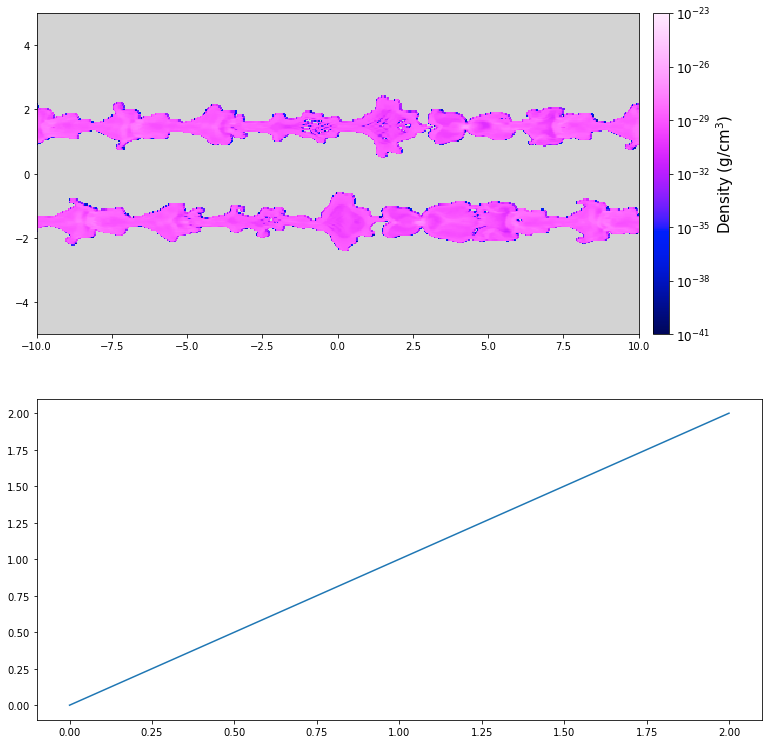

In [23]:
xs = [0, -10, 1]
ys = [1.46, 1.2, 0.4]

dxs = [10, 11, 3]
dys = [0, 0, 0]

dvx = [0, 1, 2]
dvy = [0, 1, 2]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(13,13))
ax[0].set_facecolor('lightgray')

ax_x = np.arange(513)*(20/512)-10
ax_y = np.arange(257)*(20/512)-5

sp = ax[0].pcolormesh(ax_x, ax_y, a[:,:,128].T, cmap = "cet_bmw", norm=colors.LogNorm())
cb = fig.colorbar(sp, pad=0.02, ax=ax[0]) 
cb.set_label(label='Density (g/cm$^3$)', size=15)
cb.ax.tick_params(labelsize='large')
sp.set_clim(vmin=10**-41, vmax=10**-23)
ax[1].plot(dvx,dvy)
for i in range(len(xs)):
    testarrow = ax[0].arrow(xs[i],ys[i],dxs[i],dys[i],color='black', 
                          ec='black', lw=1, head_width=0.14, length_includes_head=True)
    
    
    fig.savefig('slice_samples/test'+str(i)+'.jpg')
    
    testarrow.remove()


In [24]:
img_array = []
numbers = re.compile(r'(\d+)')
                     
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts
                     
for filename in sorted(glob.glob('/Users/sofimar/Desktop/Summer Research/slice_samples/*jpg'), 
                       key=numericalSort):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('project2.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 0.6, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

